In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from pryngles import *
from pryngles import pixx
import time
extension="pixx"
#extension="cpixx"
import multiprocessing as mp
import os,sys,glob
from os import listdir
from os.path import isfile, join
from scipy.optimize import minimize, differential_evolution

# Import local functions
import extra_func as efunc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
b = 0.79#0.084#0.16
aR = 0.071*Consts.au/(0.75*Consts.rsun)#20.3564
orbit_i = np.arccos(b/aR)/Consts.deg
print("Orbit inclination: ", orbit_i)

# orbit_i = 90
ring_i = 45
ring_l = 45
gamma, beta_obs, lamb_obs, lamb_star = Util.calcStartingPosition(orbit_i,ring_i,ring_l)

pixx_sys = System()
s=pixx_sys.add(kind="Star",physics=dict(radius=0.75*Consts.rsun/pixx_sys.ul),optics=dict(limb_coeffs=[0.11,0.23]))#[0.17,0.15]
p=pixx_sys.add(kind="Planet", primary=s, 
               radius=0.367*Consts.rjupiter/pixx_sys.ul,#0.375
               orbit=dict(a=0.071, e=0.255),#0.22
               physics=dict(radius=0.367*Consts.rjupiter/pixx_sys.ul),
               optics=dict(nspangles=5000))
r=pixx_sys.add(kind="Ring", primary=p,
               physics=dict(fi=1.2, fe=2.48, i=gamma),#1.5 2.25
               optics=dict(nspangles=5000))

RP=pixx_sys.ensamble_system(extension=extension, 
                            fname_planet="./fou_files/Planet/fou_bmsca60.0_asurf0.5.dat",
                            fname_ring="./fou_files/Ring/Mie/fou_file_mie_1.5_040_4500_0.6_0.3_60gaus.dat")
# "./fou_files/Ring/Mie/fou_file_mie_1.5_080_4500_2.0_0.3_90gaus.dat" "./fou_files/Ring/fou_ring_2_0_0_3.dat"
RP.behavior["interp_method_ring"] = "bilinear"
RP.behavior["allow_non_uni"] = True
RP.lambq = 0

Orbit inclination:  87.77587954164022


In [20]:
thetap=RP.thetap
thetas=RP.thetas
thetar=RP.thetar
print("fe: ", RP.fe)
print("Theta p: ", thetap*180/np.pi)
print("Theta r: ", thetar*180/np.pi)
print("Theta s: ", thetas*180/np.pi)
print(RP.behavior["interp_method_planet"])
print(RP.behavior["interp_method_ring"])
print(RP.behavior["allow_non_uni"])
print(RP.physics["limit_angle_non_uni"])

lamb_initial=lamb_star - thetas - 4*RP.fe*RP.thetap
lamb_final=lamb_star + thetas + 4*RP.fe*RP.thetap
lambs = np.linspace(lamb_initial,lamb_final,400)

lq = np.linspace(0,2*np.pi,1000)
d_max = 0
lambq_max = 0
for ii,l in enumerate(lq):
    RP.lambq = l
    RP.changeStellarPosition(lamb_initial)
    d = RP.rstar
    if d >= d_max:
        i_max = ii
        d_max = d
        lambq_max = l
            
RP.lambq = lambq_max
print(i_max,d_max)
print(RP.lambq*180/np.pi)

thetap=RP.thetap
thetas=RP.thetas
thetar=RP.thetar
print("fe: ", RP.fe)
print("Theta p: ", thetap*180/np.pi)
print("Theta r: ", thetar*180/np.pi)
print("Theta s: ", thetas*180/np.pi)
print(RP.behavior["interp_method_planet"])
print(RP.behavior["interp_method_ring"])
print(RP.behavior["allow_non_uni"])
print(RP.physics["limit_angle_non_uni"])

lamb_initial=lamb_star - thetas - 4*RP.fe*RP.thetap
lamb_final=lamb_star + thetas + 4*RP.fe*RP.thetap
lambs = np.linspace(lamb_initial,lamb_final,400)

lq = np.linspace(0,2*np.pi,1000)
d_max = 0
lambq_max = 0
for ii,l in enumerate(lq):
    RP.lambq = l
    RP.changeStellarPosition(lamb_initial)
    d = RP.rstar
    if d >= d_max:
        i_max = ii
        d_max = d
        lambq_max = l
            
RP.lambq = lambq_max
print(i_max,d_max)
print(RP.lambq*180/np.pi)

thetap=RP.thetap
thetas=RP.thetas
thetar=RP.thetar
print("fe: ", RP.fe)
print("Theta p: ", thetap*180/np.pi)
print("Theta r: ", thetar*180/np.pi)
print("Theta s: ", thetas*180/np.pi)
print(RP.behavior["interp_method_planet"])
print(RP.behavior["interp_method_ring"])
print(RP.behavior["allow_non_uni"])
print(RP.physics["limit_angle_non_uni"])

lamb_initial=lamb_star - thetas - 4*RP.fe*RP.thetap
lamb_final=lamb_star + thetas + 4*RP.fe*RP.thetap
lambs = np.linspace(lamb_initial,lamb_final,400)

lq = np.linspace(0,2*np.pi,1000)
d_max = 0
lambq_max = 0
for ii,l in enumerate(lq):
    RP.lambq = l
    RP.changeStellarPosition(lamb_initial)
    d = RP.rstar
    if d >= d_max:
        i_max = ii
        d_max = d
        lambq_max = l
            
RP.lambq = lambq_max
print(i_max,d_max)
print(RP.lambq*180/np.pi)

thetap=RP.thetap
thetas=RP.thetas
thetar=RP.thetar
print("fe: ", RP.fe)
print("Theta p: ", thetap*180/np.pi)
print("Theta r: ", thetar*180/np.pi)
print("Theta s: ", thetas*180/np.pi)
print(RP.behavior["interp_method_planet"])
print(RP.behavior["interp_method_ring"])
print(RP.behavior["allow_non_uni"])
print(RP.physics["limit_angle_non_uni"])

fe:  2.48
Theta p:  0.18997852797008952
Theta r:  0.47113785686393883
Theta s:  3.7725726802573987
spline
bilinear
True
0.05
105 25.54722971415375
37.83783783783784
fe:  2.48
Theta p:  0.1208369538244015
Theta r:  0.2996733571523207
Theta s:  2.4016278739849666
spline
bilinear
True
0.05
110 25.54723414449351
39.63963963963963
fe:  2.48
Theta p:  0.12170392794865995
Theta r:  0.30182340337215197
Theta s:  2.4188385957415544
spline
bilinear
True
0.05
110 25.547241575702742
39.63963963963963
fe:  2.48
Theta p:  0.12169280901947953
Theta r:  0.3017958290685057
Theta s:  2.4186178712633906
spline
bilinear
True
0.05


In [22]:
print(lamb_star/Consts.deg)

lamb_initial=lamb_star - thetas - 4*RP.fe*RP.thetap
lamb_final=lamb_star + thetas + 4*RP.fe*RP.thetap
lambs = np.linspace(lamb_initial,lamb_final,400)

# Initialise the starting position
RP.changeObserver([lamb_obs,beta_obs])
RP.changeStellarPosition(lamb_initial)
RP._updateGeometricalFactors()
RP._updateIncomingStellarFlux()
RP._updateObservedFacetAreas()

Stot  = []
Rip   = []
Rir   = []
Sp    = []
Sr    = []
Ptot  = []
Pp    = []
Pr    = []
Tp    = []
Tr    = []
T     = []
alpha = []
ts    = []
theta = []
theta0= []
rstar = []

for lamb in lambs:
    RP.changeStellarPosition(lamb)
    print("True anomaly: ", (lamb-lamb_star)/Consts.deg)
    RP._updateGeometricalFactors()
    RP._updateIncomingStellarFlux()
    RP._updateObservedFacetAreas()
    RP.updateReflection(taur=0.6,normalize=False)
    
    back = False 
    if (np.inner(RP.nstar_equ,RP.nr_equ) < 0) ^ (np.inner(RP.nobs_equ,RP.nr_equ) < 0):
        back = True
    print("Is there light transmitted through the ring: ", back)
    print("Illumination: ", np.arccos(abs(RP.etars[0]))/Consts.deg, 
          "Viewing: ", np.arccos(abs(RP.zetars[0]))/Consts.deg)
    #Planet conditions
    condo=(RP.ap)*(RP.ip)

    # Facets that are illuminated through the rings
    condspr = (RP.apsr)*(RP.ips)

    # Facets that are visible but the line of sight is blocked by the rings
    condspo = (RP.apso)*(RP.ip)

    # Facets that are both of the above
    condspb = (RP.apsb)*(~RP.tp)

    cond = condo + condspr + condspo + condspb
#     print("Number of planet spangles active: ", cond.sum())
#     if abs(lamb - lamb_star)/Consts.deg < 0.1:
#         RP.plotRingedPlanet(showstar=True,showfig=True)
#         plt.show()
#         plt.close()
            
#     print("Minimum azimuthal difference angle: ", np.min(RP.phidiffps)/Consts.deg)
    
    # Save the relevant data
    Stot  += [RP.Stot]
    Rir   += [RP.Rir]
    Rip   += [RP.Rip]
    Sp    += [RP.Stotp]
    Sr    += [RP.Stotr]
    Ptot  += [RP.Ptot]
    Pp    += [RP.Ptotp]
    Pr    += [RP.Ptotr]
    alpha += [np.arccos(RP.alphaps)/Consts.deg]
    ts    += [RP.t*RP.CU.UT]
    theta += [RP.zetars]
    theta0+= [RP.etars]
    rstar += [RP.rstar]
    
    RP.updateTransit()
    Tp += [-RP.Tip.sum()]
    Tr += [-RP.Tir.sum()] 
    T  += [Tp[-1]+Tr[-1] + RP.Stot[0]/1e6]
    
true_anomaly = list((lambs-lamb_star)/Consts.deg)    
save_dict = {"lambda": true_anomaly, "alpha": alpha, "Stot": Stot,
             "Sp": Sp, "Sr": Sr, "Ptot": Ptot, "Pp": Pp, "Pr": Pr,
             "Ttot": T, "Tp": Tp, "Tr": Tr, "Time": ts, "Theta": theta,
             "Theta0": theta0, "Rstar": rstar, "Rip": Rip, "Rir": Rir}

#Pickle the data, if file already exists it will be overwritten
with open("/home/allard/Data/Transit_test/transit_test30.pkl", "wb") as f:
    pickle.dump(save_dict, f)

-136.63903800815618
True anomaly:  -3.540503670590325
Is there light transmitted through the ring:  True
Illumination:  63.92178768254808 Viewing:  60.00000015600781
True anomaly:  -3.522756785023455
Is there light transmitted through the ring:  True
Illumination:  63.91137495670367 Viewing:  60.00000015600781
True anomaly:  -3.505009899456585
Is there light transmitted through the ring:  True
Illumination:  63.900963995573484 Viewing:  60.00000015600781
True anomaly:  -3.4872630138897147
Is there light transmitted through the ring:  True
Illumination:  63.89055480027956 Viewing:  60.00000015600781
True anomaly:  -3.469516128322845
Is there light transmitted through the ring:  True
Illumination:  63.880147371944474 Viewing:  60.00000015600781
True anomaly:  -3.451769242755975
Is there light transmitted through the ring:  True
Illumination:  63.869741711691105 Viewing:  60.00000015600781
True anomaly:  -3.434022357189105
Is there light transmitted through the ring:  True
Illumination:  

Is there light transmitted through the ring:  True
Illumination:  63.34142396169734 Viewing:  60.00000015600781
True anomaly:  -2.5289311932788143
Is there light transmitted through the ring:  True
Illumination:  63.33111180013093 Viewing:  60.00000015600781
True anomaly:  -2.5111843077119445
Is there light transmitted through the ring:  True
Illumination:  63.320801466798535 Viewing:  60.00000015600781
True anomaly:  -2.4934374221450746
Is there light transmitted through the ring:  True
Illumination:  63.31049296284715 Viewing:  60.00000015600781
True anomaly:  -2.4756905365782043
Is there light transmitted through the ring:  True
Illumination:  63.30018628942422 Viewing:  60.00000015600781
True anomaly:  -2.4579436510113344
Is there light transmitted through the ring:  True
Illumination:  63.28988144767763 Viewing:  60.00000015600781
True anomaly:  -2.4401967654444645
Is there light transmitted through the ring:  True
Illumination:  63.27957843875571 Viewing:  60.00000015600781
True 

Is there light transmitted through the ring:  True
Illumination:  62.766790354025524 Viewing:  60.00000015600781
True anomaly:  -1.5351056015341484
Is there light transmitted through the ring:  True
Illumination:  62.75658235239248 Viewing:  60.00000015600781
True anomaly:  -1.5173587159672783
Is there light transmitted through the ring:  True
Illumination:  62.746376243917794 Viewing:  60.00000015600781
True anomaly:  -1.4996118304004085
Is there light transmitted through the ring:  True
Illumination:  62.73617202977366 Viewing:  60.00000015600781
True anomaly:  -1.4818649448335386
Is there light transmitted through the ring:  True
Illumination:  62.725969711132755 Viewing:  60.00000015600781
True anomaly:  -1.4641180592666685
Is there light transmitted through the ring:  True
Illumination:  62.715769289168236 Viewing:  60.00000015600781
True anomaly:  -1.4463711736997986
Is there light transmitted through the ring:  True
Illumination:  62.70557076505366 Viewing:  60.00000015600781
Tr

Is there light transmitted through the ring:  True
Illumination:  62.198090387033524 Viewing:  60.00000015600781
True anomaly:  -0.5412800097895079
Is there light transmitted through the ring:  True
Illumination:  62.187990220068954 Viewing:  60.00000015600781
True anomaly:  -0.5235331242226379
Is there light transmitted through the ring:  True
Illumination:  62.17789201260642 Viewing:  60.00000015600781
True anomaly:  -0.505786238655768
Is there light transmitted through the ring:  True
Illumination:  62.16779576584364 Viewing:  60.00000015600781
True anomaly:  -0.488039353088898
Is there light transmitted through the ring:  True
Illumination:  62.15770148097875 Viewing:  60.00000015600781
True anomaly:  -0.4702924675220281
Is there light transmitted through the ring:  True
Illumination:  62.14760915921033 Viewing:  60.00000015600781
True anomaly:  -0.4525455819551581
Is there light transmitted through the ring:  True
Illumination:  62.13751880173744 Viewing:  60.00000015600781
True a

Is there light transmitted through the ring:  True
Illumination:  61.635532037716516 Viewing:  60.00000015600781
True anomaly:  0.4525455819551581
Is there light transmitted through the ring:  True
Illumination:  61.62554345996344 Viewing:  60.00000015600781
True anomaly:  0.4702924675220281
Is there light transmitted through the ring:  True
Illumination:  61.61555690948658 Viewing:  60.00000015600781
True anomaly:  0.488039353088898
Is there light transmitted through the ring:  True
Illumination:  61.605572387509184 Viewing:  60.00000015600781
True anomaly:  0.505786238655768
Is there light transmitted through the ring:  True
Illumination:  61.59558989525506 Viewing:  60.00000015600781
True anomaly:  0.5235331242226379
Is there light transmitted through the ring:  True
Illumination:  61.585609433948406 Viewing:  60.00000015600781
True anomaly:  0.5412800097895079
Is there light transmitted through the ring:  True
Illumination:  61.57563100481391 Viewing:  60.00000015600781
True anomal

Is there light transmitted through the ring:  True
Illumination:  61.069454613528805 Viewing:  60.00000015600781
True anomaly:  1.4641180592666685
Is there light transmitted through the ring:  True
Illumination:  61.05958355632705 Viewing:  60.00000015600781
True anomaly:  1.4818649448335386
Is there light transmitted through the ring:  True
Illumination:  61.04971459686177 Viewing:  60.00000015600781
True anomaly:  1.4996118304004085
Is there light transmitted through the ring:  True
Illumination:  61.03984773638243 Viewing:  60.00000015600781
True anomaly:  1.5173587159672783
Is there light transmitted through the ring:  True
Illumination:  61.029982976138925 Viewing:  60.00000015600781
True anomaly:  1.5351056015341484
Is there light transmitted through the ring:  True
Illumination:  61.02012031738165 Viewing:  60.00000015600781
True anomaly:  1.5528524871010183
Is there light transmitted through the ring:  True
Illumination:  61.010259761361425 Viewing:  60.00000015600781
True anom

Is there light transmitted through the ring:  True
Illumination:  60.51018908080157 Viewing:  60.00000015600781
True anomaly:  2.4756905365782043
Is there light transmitted through the ring:  True
Illumination:  60.500439602137604 Viewing:  60.00000015600781
True anomaly:  2.4934374221450746
Is there light transmitted through the ring:  True
Illumination:  60.49069229316137 Viewing:  60.00000015600781
True anomaly:  2.5111843077119445
Is there light transmitted through the ring:  True
Illumination:  60.480947155148485 Viewing:  60.00000015600781
True anomaly:  2.5289311932788143
Is there light transmitted through the ring:  True
Illumination:  60.47120418937498 Viewing:  60.00000015600781
True anomaly:  2.546678078845684
Is there light transmitted through the ring:  True
Illumination:  60.46146339711739 Viewing:  60.00000015600781
True anomaly:  2.5644249644125288
Is there light transmitted through the ring:  True
Illumination:  60.45172477965269 Viewing:  60.00000015600781
True anomal

Is there light transmitted through the ring:  True
Illumination:  59.957969123313354 Viewing:  60.00000015600781
True anomaly:  3.4872630138897147
Is there light transmitted through the ring:  True
Illumination:  59.94834536608812 Viewing:  60.00000015600781
True anomaly:  3.505009899456585
Is there light transmitted through the ring:  True
Illumination:  59.938723851989316 Viewing:  60.00000015600781
True anomaly:  3.522756785023455
Is there light transmitted through the ring:  True
Illumination:  59.929104582318566 Viewing:  60.00000015600781
True anomaly:  3.540503670590325
Is there light transmitted through the ring:  True
Illumination:  59.91948755837796 Viewing:  60.00000015600781


<IPython.core.display.Javascript object>


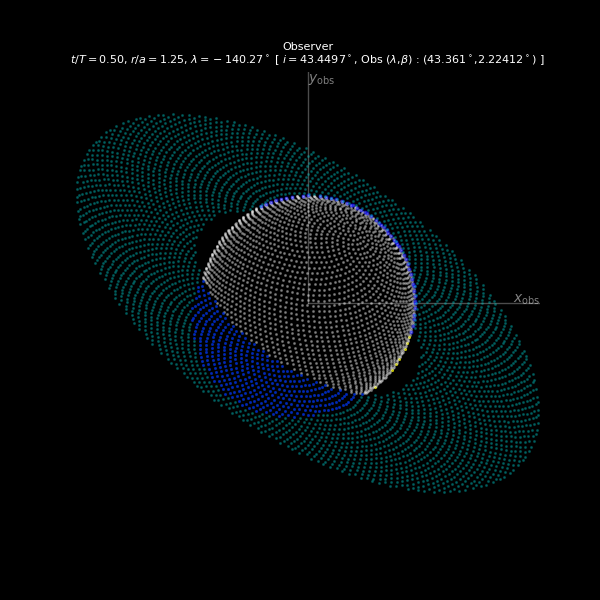

<IPython.core.display.Javascript object>


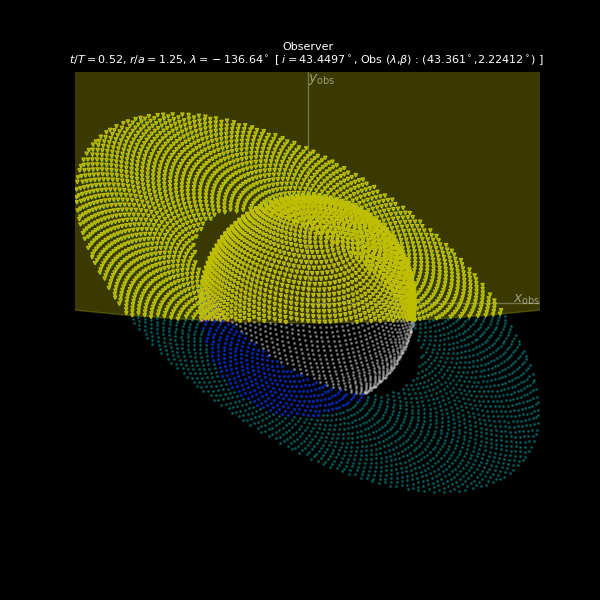

<IPython.core.display.Javascript object>


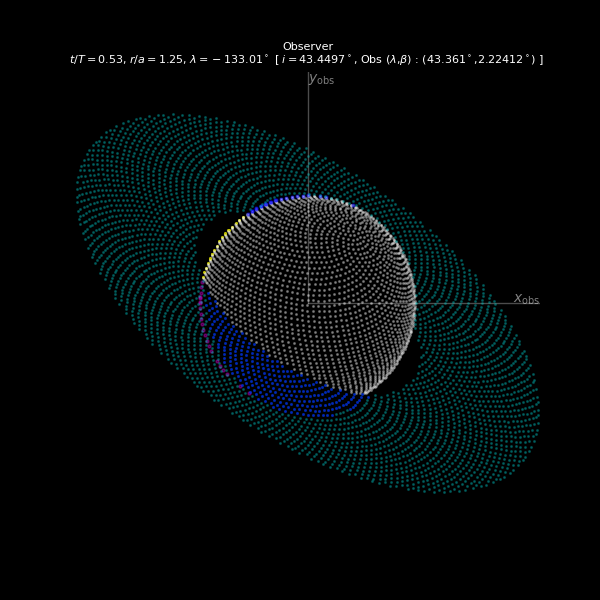

In [21]:
RP.changeObserver([lamb_obs,beta_obs])
RP.changeStellarPosition(lamb_initial)
RP._updateGeometricalFactors()
RP._updateIncomingStellarFlux()
RP._updateObservedFacetAreas()

junk1,fig,junk2 = RP.plotRingedPlanet(showstar=True,showfig=False)
fig.show()

RP.changeStellarPosition(lamb_star)
RP._updateGeometricalFactors()
RP._updateIncomingStellarFlux()
RP._updateObservedFacetAreas()

junk1,fig,junk2 = RP.plotRingedPlanet(showstar=True,showfig=False)
fig.show()

RP.changeStellarPosition(lamb_final)
RP._updateGeometricalFactors()
RP._updateIncomingStellarFlux()
RP._updateObservedFacetAreas()

junk1,fig,junk2 = RP.plotRingedPlanet(showstar=True,showfig=False)
fig.show()

<IPython.core.display.Javascript object>


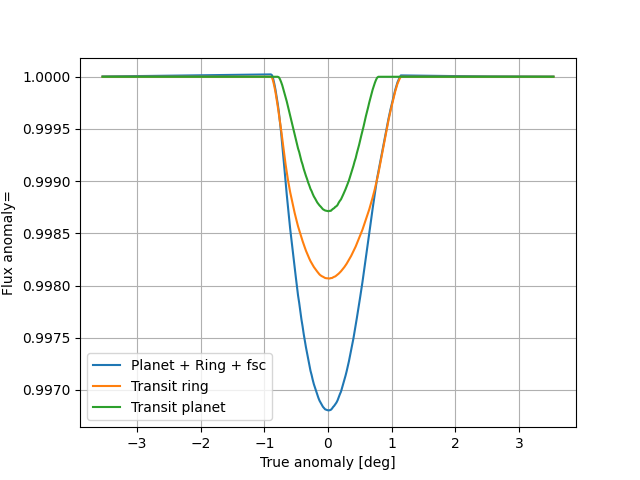

<IPython.core.display.Javascript object>


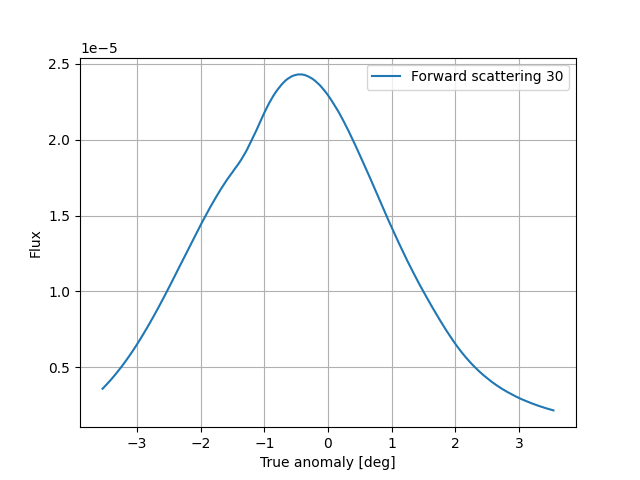

[0.         0.         0.00778818 ... 0.0069358  0.00690164 0.00874541]
0.0


In [28]:
pc = 206265 # parsec in AU
# Rs = 0.75*Consts.rsun/pixx_sys.ul # Stellar radius in AU
pcRs = 1#np.sqrt(1e-3)#9.79*pc/Rs # parsec in stellar radius

fig1=plt.figure()
ax1=fig1.gca()

fig2=plt.figure()
ax2=fig2.gca()
nums = np.array([30])
for ii,num in enumerate(nums):
    data_name = f"/home/allard/Data/Transit_test/transit_test{num}.pkl"
    with open(data_name,"rb") as f:
        save_file = pickle.load(f)

    true_anomaly = np.array(save_file["lambda"])
    alpha = np.array(save_file["alpha"])
    Stot  = np.array(save_file["Stot"])
    Rip   = np.array(save_file["Rip"])
    Rir   = np.array(save_file["Rir"])
    Sp    = np.array(save_file["Sp"])
    Sr    = np.array(save_file["Sr"])
    Ptot  = np.array(save_file["Ptot"])
    Pp    = np.array(save_file["Pp"])
    Pr    = np.array(save_file["Pr"])
    Ttot  = np.array(save_file["Ttot"])
    Tp    = np.array(save_file["Tp"])
    Tr    = np.array(save_file["Tr"])
    ts    = np.array(save_file["Time"])
    theta = np.arccos(np.array(save_file["Theta"]))*180/np.pi
    theta0= np.arccos(np.array(save_file["Theta0"]))*180/np.pi
    rstar = np.array(save_file["Rstar"])
    ts=(ts-ts[0])/Consts.day

    ax1.plot(true_anomaly, Ttot+1, label="Planet + Ring + fsc")
#     ax1.plot(true_anomaly, Tr + Tp+1 +Stot[:,0]/1e6, label="Planet + Ring")
    ax1.plot(true_anomaly, Tr+1, label="Transit ring")
    ax1.plot(true_anomaly, Tp+1, label="Transit planet")
    ax1.legend()
    ax1.set_ylabel("Flux anomaly=")
    ax1.set_xlabel("True anomaly [deg]")
    ax1.grid()
    
    if ii == 0:
        Stot_save = Stot/1e6
    else:
        ax2.plot(true_anomaly, Stot[:,0]/1e6-Stot_save[:,0], label="Forward scattering difference")
    # ax2.plot(ts, Stot[:,0]/1e6,".-", label="Forward scattering tot")
    # ax2.plot(ts[178], Stot[178,0]/1e6,".", label="Forward scattering tot")
    # ax2.plot(true_anomaly, Sp[:,0]/1e6, label="Forward scattering planet")
    # ax2.plot(true_anomaly, Sr[:,0]/1e6, label="Forward scattering ring")
    ax2.plot(true_anomaly, Stot[:,0]/1e6, label=f"Forward scattering {num}")
    # ax2.plot(180- alpha, Stot[:,0]/1e6, label="Forward scattering")
    # ax2.plot(rstar,Stot[:,0]/1e6,label="Forward scattering")
    # ax2.plot(true_anomaly, theta0[:,:10], label="Theta0")

#     ax2.plot(true_anomaly,np.sum(Rir,axis=1)/1e6,label="Rir")

    # ax2.plot(theta0[0,:],Rir[0,:],".",label="0")
    # ax2.plot(theta0[50,:],Rir[50,:],".",label="50")
    # ax2.plot(theta0[100,:],Rir[100,:],".",label="100")
    # ax2.plot(theta0[120,:],Rir[120,:],".",label="120")
    # ax2.plot(theta0[150,:],Rir[150,:],".",label="150")
    # ax2.plot(theta0[160,:],Rir[160,:],".",label="160")
    # ax2.plot(theta0[165,:],Rir[165,:],".",label="165")
    # ax2.plot(theta0[170,:],Rir[170,:],".",label="170")
    # ax2.plot(theta0[176,:],Rir[176,:],".",label="176")
    # ax2.plot(theta0[178,:],Rir[178,:],".",label="178")
    # ax2.plot(theta0[-1,:],Rir[-1,:],".",label="-1")

    # ax2.plot(180- alpha, theta0, label="Theta0")
    # ax2.plot(ts,theta+theta0)
    # ax2.plot(ts, Sp[:,0]/1e6, label="Planet")
    # ax2.plot(ts, Sr[:,0]/1e6, label="Ring")
    print(Rir[176,:])
    
ax2.legend()
ax2.grid()
ax2.set_ylabel("Flux")
ax2.set_xlabel("True anomaly [deg]")
# ax2.set_yscale('log')
plt.plot()

print((1-np.max(Stot_save[:,0])/np.max(Stot[:,0]/1e6))*100)

5981


<IPython.core.display.Javascript object>


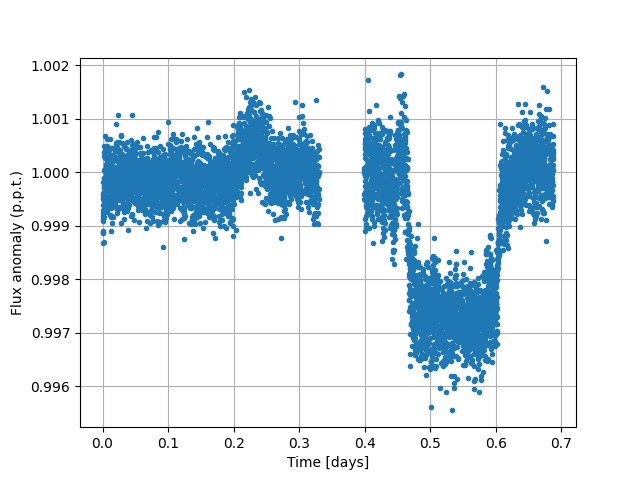

In [22]:
file_spitzer_1 = "n20190210.Spit45.Spitzer.b_first_detrend.dat"
file_spitzer_2 = "n20190227.Spit45.Spitzer_second.b_detrend.dat" # Misses ingress
file_spitzer_3 = "n20190909.Spit45.Spitzer_third_plus_extra.b_detrend.dat"

file_tess_1 = "n20180726.TESS.TESS.b.dat"
file_tess_2 = "n20180812.TESS.TESS.b.dat"
file_tess_3 = "n20200710.TESS.TESS.b.dat"
file_tess_4 = "n20200719.TESS.TESS.b.dat"
file_tess_5 = "n20200727.TESS.TESS.b.dat"
data_name = f"./transit_data/{file_spitzer_3}"
time = []
flux = []
flux_err = []
ii = 0
for line in open(data_name).readlines():
    if ii > 1:
        sp = line.split()
        time += [float(sp[0])]
        flux += [float(sp[1])]
        flux_err += [float(sp[2])]
    ii += 1
        
time = np.array(time)
flux = np.array(flux)
flux_err = np.array(flux_err)
print(len(flux))
time = time - time[0]

fig1=plt.figure()
ax1=fig1.gca()

ax1.plot(time,flux, '.')
# ax1.plot(time,flux, '.')
#ax1.plot(ts+0.38014503, Ttot+1, label="Planet + Ring + fsc")
# ax1.plot(ts+0.38, Tr + Tp + 1, label="Planet + Ring")
# ax1.plot(ts, Tr + 1, label="Transit ring")
#ax1.plot(ts+0.38131849, Tp + 1, label="Transit planet")
# ax1.legend()
ax1.set_ylabel("Flux anomaly (p.p.t.)")
ax1.set_xlabel("Time [days]")
ax1.grid()
plt.show()

# ax1.set_xlim([0.4,0.7])

# fig2=plt.figure()
# ax2=fig2.gca()
# y = np.interp(time[3059:],ts+0.38131849,Tp+1)
# ax2.plot(time[3059:],flux[3059:], '.',label="original data")
# ax2.plot(time[3059:],y, '.',label="interpolated")
# ax2.plot(ts+0.38131849, Tp + 1, '.',label="Model")
# ax2.legend()
# ax2.grid()

# print("RMS: ", np.sqrt(np.sum((y-flux[3059:])**2)/len(y)))

In [35]:
def func(x,time,ts,Tp,flux):
    return np.sqrt(np.sum((np.interp(time,ts+x,Tp)-flux)**2)/len(flux))
res = minimize(func, 0.38, args = (time[3059:],ts,Ttot+1,flux[3059:]))
print(res.x)
print(res.fun)

[0.38014503]
0.0007108266184317812


## Fit a curve to the data

In [5]:
"""
x = [b,ring_i,ring_l,r,a,e,fi,fe,lincoef,quadcoef,optical_th]
x[0] = b ; impact parameter
x[1] = ring_i ; ring_inclination
x[2] = ring_l ; ring roll
x[3] = r ; planetary radius, in terms of the radius of jupiter
x[4] = a ; semi-major axis of the orbit
x[5] = e ; eccentricity of the orbit
x[6] = fi ; inner radius of ring, in terms of planetary radius
x[7] = fe ; outer radius of ring, in terms of planetary radius
x[8] = lincoef ; linear limb-darkening coefficient
x[9] = quadcoef ; quadratic limb-darkening coefficient
x[10] = optical_th ; optical thickness of the ring
x[11] = particle_r ; radius of the particles

fitx = x-array of observations
fity = y-array of observations
"""
file_spitzer_1 = "n20190210.Spit45.Spitzer.b_first_detrend.dat"
file_spitzer_2 = "n20190227.Spit45.Spitzer_second.b_detrend.dat" # Misses ingress
file_spitzer_3 = "n20190909.Spit45.Spitzer_third_plus_extra.b_detrend.dat"

file_tess_1 = "n20180726.TESS.TESS.b.dat"
file_tess_2 = "n20180812.TESS.TESS.b.dat"
file_tess_3 = "n20200710.TESS.TESS.b.dat"
file_tess_4 = "n20200719.TESS.TESS.b.dat"
file_tess_5 = "n20200727.TESS.TESS.b.dat"
data_name = f"./transit_data/{file_spitzer_3}"
time = []
flux = []
flux_err = []
ii = 0
for line in open(data_name).readlines():
    if ii > 1:
        sp = line.split()
        time += [float(sp[0])]
        flux += [float(sp[1])]
        flux_err += [float(sp[2])]
    ii += 1
        
time = np.array(time)
flux = np.array(flux)
flux_err = np.array(flux_err)

time = time - time[0]

time = time[3059:]
flux = flux[3059:]

"""
    Used numbers: 
    0 (seed=1), 
    1 (seed=2, with x0, changed mutation parameters: mutation to (0.2,1.2), recombination to 0.5),
    2 (seed=2, fixed optical thickness problem in funtion, same parameters as number 1),
    3 (seed=3, popsize=42, mutation=(0.1,1.5), recombination=0.4),
    4 (local optimization, Nelder-Mead, x0=x0_best, bounds=range of 10 best),
    5 (local optimization, CG),
    6 (local optimization, L-BFGS-B),
    7 (local optimization, CG with second best solution of run3),
    8 (seed=3, fixed problem with ring flux (was too high)),
    9 (seed=3, fixed problem with ring flux (forgot ppm)),
    10 (seed=3, mie scattering files, changed function, added integrality),
    11 (seed=4, mie scattering files, 12 workers, fixed silent errors(?)),
    12 (seed=4, mie scattering only 20 and 40 mu, 12 workers, added normal particles as third radius),
    13 (seed=4, added posibility of no ring to the fit, 14 workers 56 population),
    14 (seed=4, added no ring, 14 workers 56 pop, fixed stupid problem with etars)
"""

run_num = 14 

bounds = [(0.05, 0.3), (1, 89), (-89, 89), (0.357, 0.393), (0.06, 0.073), (0.01, 0.27),
          (1.2, 2), (2.01, 4), (0.05, 0.39), (0.0, 0.42), (0, 12), (0,2)]
integrality_list = [False,False,False,False,False,False,False,False,False,False,True,True]
# x0 = np.array([0.10645218671168435, 85.75714378158361, -47.207062778137455, 
#                0.3588572642933622, 0.07286797356148741, 0.2682722687112035, 
#                1.790851434272016, 2.2350936289290684, 0.10248150639214178, 
#                0.3478243627829524, -0.8829359719086392])
result = differential_evolution(efunc.transitFitMie, bounds, args=(time,flux,run_num,), popsize=56,
                                updating='deferred',mutation=(0.1,1.5),recombination=0.4,
                                workers=14,seed=4,disp=True,integrality=integrality_list)#, x0=x0_best)

differential_evolution step 1: f(x)= 0.000512306
differential_evolution step 2: f(x)= 0.000500522
differential_evolution step 3: f(x)= 0.000499272
differential_evolution step 4: f(x)= 0.000499272
differential_evolution step 5: f(x)= 0.000499272
differential_evolution step 6: f(x)= 0.00049847
differential_evolution step 7: f(x)= 0.000497788
differential_evolution step 8: f(x)= 0.000497527
differential_evolution step 9: f(x)= 0.000497449
differential_evolution step 10: f(x)= 0.000497449
differential_evolution step 11: f(x)= 0.000497449
differential_evolution step 12: f(x)= 0.000497449
differential_evolution step 13: f(x)= 0.000497429
differential_evolution step 14: f(x)= 0.000497429
differential_evolution step 15: f(x)= 0.000497429
differential_evolution step 16: f(x)= 0.000497423
differential_evolution step 17: f(x)= 0.000497397
differential_evolution step 18: f(x)= 0.00049739
differential_evolution step 19: f(x)= 0.000497379
differential_evolution step 20: f(x)= 0.000497379
Polishing s

## Local optimization of results

In [ ]:
"""
x = [b,ring_i,ring_l,r,a,e,fi,fe,lincoef,quadcoef,optical_th]
x[0] = b ; impact parameter
x[1] = ring_i ; ring_inclination
x[2] = ring_l ; ring roll
x[3] = r ; planetary radius, in terms of the radius of jupiter
x[4] = a ; semi-major axis of the orbit
x[5] = e ; eccentricity of the orbit
x[6] = fi ; inner radius of ring, in terms of planetary radius
x[7] = fe ; outer radius of ring, in terms of planetary radius
x[8] = lincoef ; linear limb-darkening coefficient
x[9] = quadcoef ; quadratic limb-darkening coefficient
x[10] = optical_th ; optical thickness of the ring

fitx = x-array of observations
fity = y-array of observations
"""
file_spitzer_1 = "n20190210.Spit45.Spitzer.b_first_detrend.dat"
file_spitzer_2 = "n20190227.Spit45.Spitzer_second.b_detrend.dat" # Misses ingress
file_spitzer_3 = "n20190909.Spit45.Spitzer_third_plus_extra.b_detrend.dat"

data_name = f"./transit_data/{file_spitzer_3}"
time = []
flux = []
flux_err = []
ii = 0
for line in open(data_name).readlines():
    if ii > 1:
        sp = line.split()
        time += [float(sp[0])]
        flux += [float(sp[1])]
        flux_err += [float(sp[2])]
    ii += 1
        
time = np.array(time)
flux = np.array(flux)
flux_err = np.array(flux_err)

time = time - time[0]

time = time[3059:]
flux = flux[3059:]
"""
    Used numbers: 
    0 (seed=1), 
    1 (seed=2, with x0, changed mutation parameters: mutation to (0.2,1.2), recombination to 0.5),
    2 (seed=2, fixed optical thickness problem in funtion, same parameters as number 1),
    3 (seed=3, popsize=42, mutation=(0.1,1.5), recombination=0.4),
    4 (local optimization, Nelder-Mead, x0=x0_best, bounds=range of 10 best),
    5 (local optimization, CG),
    6 (local optimization, L-BFGS-B)
"""
run_num = 4 

bounds = [(avg_x[0]-std_x[0], avg_x[0]+std_x[0]), (avg_x[1]-std_x[1], avg_x[1]+std_x[1]), 
          (avg_x[2]-std_x[2], avg_x[2]+std_x[2]), (avg_x[3]-std_x[3], avg_x[3]+std_x[3]), 
          (avg_x[4]-std_x[4], avg_x[4]+std_x[4]), (avg_x[5]-std_x[5], avg_x[5]+std_x[5]), 
          (avg_x[6]-std_x[6], avg_x[6]+std_x[6]), (avg_x[7]-std_x[7], avg_x[7]+std_x[7]), 
          (avg_x[8]-std_x[8], avg_x[8]+std_x[8]), (avg_x[9]-std_x[9], avg_x[9]+std_x[9]), 
          (10**(avg_x[10]-std_x[10]), 10**(avg_x[10]+std_x[10]))]
# x0 = np.array([0.10645218671168435, 85.75714378158361, -47.207062778137455, 
#                0.3588572642933622, 0.07286797356148741, 0.2682722687112035, 
#                1.790851434272016, 2.2350936289290684, 0.10248150639214178, 
#                0.3478243627829524, -0.8829359719086392])
result = minimize(efunc.transitFit, x0_best, args=(time,flux,run_num,), method="Nelder-Mead", 
                  tol=1e-6, bounds=bounds)

# Check fitted curves

## Redo transit to obtain all information

In [3]:
# Load fit data
file_spitzer_3 = "n20190909.Spit45.Spitzer_third_plus_extra.b_detrend.dat"
data_name = f"./transit_data/{file_spitzer_3}"
time = []
flux = []
flux_err = []
ii = 0
for line in open(data_name).readlines():
    if ii > 1:
        sp = line.split()
        time += [float(sp[0])]
        flux += [float(sp[1])]
        flux_err += [float(sp[2])]
    ii += 1
        
time = np.array(time)
flux = np.array(flux)
flux_err = np.array(flux_err)

time = time - time[0]
time = time[3059:]
flux = flux[3059:]

# Best fit of first run
fit_file1 = "/home/allard/Data/Transit_fit/run_num0/rn0_fitness0.000522_x1_79.6_x2_86.07_fi1.80_fe2.14_e0.230_.pkl"
fit_file2 = "/home/allard/Data/Transit_fit/run_num0/rn0_fitness0.000525_x1_85.8_x2_-47.21_fi1.79_fe2.24_e0.268_.pkl"
with open(fit_file2,"rb") as f:
    save_file = pickle.load(f)
x = save_file["x"]

# Generate data from parameters
fit = efunc.transitFit(x,time,flux,0,save_everything=True)


KeyboardInterrupt



b = 0.10511817288286357 ; impact parameter 
ring_i = 85.75714378158361 ; ring_inclination 
ring_l = -47.207062778137455 ; ring roll 
r = 0.3588572642933622 ; planetary radius, in terms of the radius of jupiter 
a = 0.07286797356148741 ; semi-major axis of the orbit 
e = 0.2682722687112035 ; eccentricity of the orbit 
fi = 1.790851434272016 ; inner radius of ring, in terms of planetary radius 
fe = 2.2350936289290684 ; outer radius of ring, in terms of planetary radius 
lincoef = 0.10248150639214178 ; linear limb-darkening coefficient 
quadcoef = 0.3478243627829524 ; quadratic limb-darkening coefficient 
optical_th = -0.8829359719086392 ; optical thickness of the ring


<IPython.core.display.Javascript object>


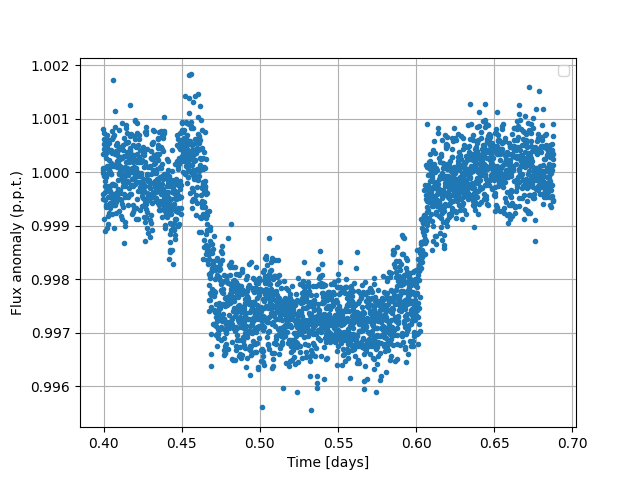

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [4]:
# Best fit : rn0_fitness0.000522_x1_79.6_.pkl
# 2nd      : rn0_fitness0.000525_x1_85.8_.pkl
save_name = "/home/allard/Data/Transit_fit_checked/run_num0/rn0_fitness0.000525_x1_85.8_.pkl"
with open(save_name,"rb") as f:
    save_file = pickle.load(f)
    
true_anomaly = np.array(save_file["lambda"])
alpha = np.array(save_file["alpha"])
Stot = np.array(save_file["Stot"])
Sp   = np.array(save_file["Sp"])
Sr   = np.array(save_file["Sr"])
Ptot = np.array(save_file["Ptot"])
Pp   = np.array(save_file["Pp"])
Pr   = np.array(save_file["Pr"])
Ttot = np.array(save_file["Ttot"])
Tp   = np.array(save_file["Tp"])
Tr   = np.array(save_file["Tr"])
ts   = np.array(save_file["Time"])
fitx = save_file["Fitx"]
fity = save_file["Fity"]
x    = save_file["x"]
shift = save_file["Shift"]

print(
    f"b = {x[0]} ; impact parameter \n" +\
    f"ring_i = {x[1]} ; ring_inclination \n" +\
    f"ring_l = {x[2]} ; ring roll \n" +\
    f"r = {x[3]} ; planetary radius, in terms of the radius of jupiter \n" +\
    f"a = {x[4]} ; semi-major axis of the orbit \n" +\
    f"e = {x[5]} ; eccentricity of the orbit \n" +\
    f"fi = {x[6]} ; inner radius of ring, in terms of planetary radius \n" +\
    f"fe = {x[7]} ; outer radius of ring, in terms of planetary radius \n" +\
    f"lincoef = {x[8]} ; linear limb-darkening coefficient \n" +\
    f"quadcoef = {x[9]} ; quadratic limb-darkening coefficient \n" +\
    f"optical_th = {x[10]} ; optical thickness of the ring" 
    )

fig1=plt.figure()
ax1=fig1.gca()

ax1.plot(fitx,fity, '.')
# ax1.plot(ts+shift, Ttot+1, label="Best fit")
ax1.legend()
ax1.set_ylabel("Flux anomaly (p.p.t.)")
ax1.set_xlabel("Time [days]")
ax1.grid()
plt.show()

## Plot best fits

<IPython.core.display.Javascript object>


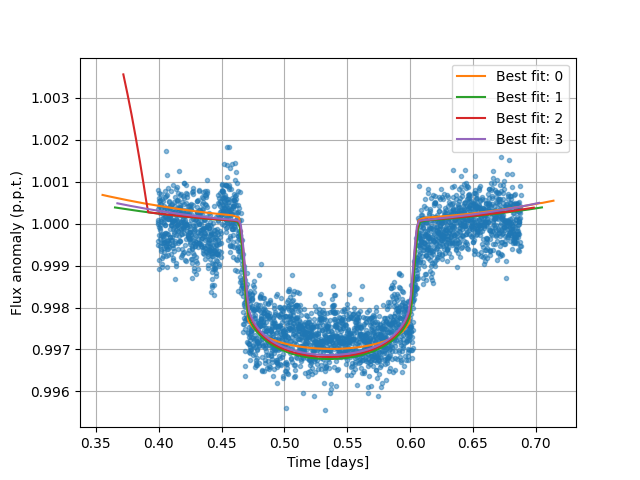

b = 0.07109637326961996 ; impact parameter 
ring_i = 87.92773594225879 ; ring_inclination 
ring_l = -71.31559675229228 ; ring roll 
r = 0.3783593393353345 ; planetary radius, in terms of the radius of jupiter 
a = 0.06655479012215455 ; semi-major axis of the orbit 
e = 0.261776497438356 ; eccentricity of the orbit 
fi = 1.6285032610682473 ; inner radius of ring, in terms of planetary radius 
fe = 2.6172882592574633 ; outer radius of ring, in terms of planetary radius 
lincoef = 0.20557187469851998 ; linear limb-darkening coefficient 
quadcoef = 0.08672790731023632 ; quadratic limb-darkening coefficient 
optical_th = 0.1298927036485868 ; optical thickness of the ring 

Average value of the parameters 
b = 0.08 +- 0.0183 ; impact parameter 
ring_i = 86.7868 +- 2.4319 ; ring_inclination 
ring_l = 37.7178 +- 63.2998 ; ring roll 
r = 0.3777 +- 0.0013 ; planetary radius, in terms of the radius of jupiter 
a = 0.0685 +- 0.0024 ; semi-major axis of the orbit 
e = 0.2484 +- 0.0128 ; eccentricit

In [8]:
def extractPlot(save_name,number):
    onlyfiles = np.array([f for f in listdir(save_name) if isfile(join(save_name, f))])
    sortedfiles = np.sort(onlyfiles)
    x_sum = np.zeros((11,number))
    
    fig1=plt.figure()
    ax1=fig1.gca()
    
    for i in np.arange(number):
        fitfile_name = save_name + "/" + sortedfiles[i]
        with open(fitfile_name,"rb") as f:
            save_file = pickle.load(f)
        fitx = save_file["Fitx"]
        fity = save_file["Fity"]
        shift = save_file["Shift"]
        x = save_file["x"]
        Ttot = np.array(save_file["Ttot"])
        ts   = np.array(save_file["Time"])
        x_sum[:,i] = x
        if i == 0:
            x0_best=x
            ax1.plot(fitx,fity,'.', alpha=0.5)
            print(
                f"b = {x[0]} ; impact parameter \n" +\
                f"ring_i = {x[1]} ; ring_inclination \n" +\
                f"ring_l = {x[2]} ; ring roll \n" +\
                f"r = {x[3]} ; planetary radius, in terms of the radius of jupiter \n" +\
                f"a = {x[4]} ; semi-major axis of the orbit \n" +\
                f"e = {x[5]} ; eccentricity of the orbit \n" +\
                f"fi = {x[6]} ; inner radius of ring, in terms of planetary radius \n" +\
                f"fe = {x[7]} ; outer radius of ring, in terms of planetary radius \n" +\
                f"lincoef = {x[8]} ; linear limb-darkening coefficient \n" +\
                f"quadcoef = {x[9]} ; quadratic limb-darkening coefficient \n" +\
                f"optical_th = {10**x[10]} ; optical thickness of the ring \n" 
                )
        ax1.plot(ts+shift, Ttot+1, label=f"Best fit: {i}")
    ax1.legend()
    ax1.set_ylabel("Flux anomaly (p.p.t.)")
    ax1.set_xlabel("Time [days]")
    ax1.grid()
    plt.show()
    
    avg_x = np.mean(x_sum, axis=1)
    std_x = np.std(x_sum,axis=1)
    print( f"Average value of the parameters \n" + \
        f"b = {round(avg_x[0],4)} +- {round(std_x[0],4)} ; impact parameter \n" +\
        f"ring_i = {round(avg_x[1],4)} +- {round(std_x[1],4)} ; ring_inclination \n" +\
        f"ring_l = {round(avg_x[2],4)} +- {round(std_x[2],4)} ; ring roll \n" +\
        f"r = {round(avg_x[3],4)} +- {round(std_x[3],4)} ; planetary radius, in terms of the radius of jupiter \n" +\
        f"a = {round(avg_x[4],4)} +- {round(std_x[4],4)} ; semi-major axis of the orbit \n" +\
        f"e = {round(avg_x[5],4)} +- {round(std_x[5],4)} ; eccentricity of the orbit \n" +\
        f"fi = {round(avg_x[6],4)} +- {round(std_x[6],4)} ; inner radius of ring, in terms of planetary radius \n" +\
        f"fe = {round(avg_x[7],4)} +- {round(std_x[7],4)} ; outer radius of ring, in terms of planetary radius \n" +\
        f"lincoef = {round(avg_x[8],4)} +- {round(std_x[8],4)} ; linear limb-darkening coefficient \n" +\
        f"quadcoef = {round(avg_x[9],4)} +- {round(std_x[9],4)} ; quadratic limb-darkening coefficient \n" +\
        f"optical_th = {round(10**avg_x[10],4)} +- {round(10**avg_x[10]-10**(avg_x[10]-std_x[10]),4)} ; optical thickness of the ring" 
    )
    return x0_best,avg_x,std_x
    
save_name = "/home/allard/Data/Transit_fit/run_num8"
x0_best,avg_x,std_x = extractPlot(save_name,4)

## Test non-unidirectional lighting

In [4]:
import spiceypy as spy
# extension = "cpixx"
extension = "pixx"

orbit_i = 90
ring_i = 50
ring_l = 80
gamma, beta_obs, lamb_obs, lamb_star = Util.calcStartingPosition(orbit_i,ring_i,ring_l)

pixx_sys = System()
s=pixx_sys.add(kind="Star",physics=dict(radius=Consts.rsun/pixx_sys.ul),optics=dict(limb_coeffs=[0.65]))
p=pixx_sys.add(kind="Planet", primary=s, 
               radius=Consts.rsaturn/pixx_sys.ul,
               orbit=dict(a=5, e=0.0),
               physics=dict(radius=Consts.rsaturn/pixx_sys.ul),
               optics=dict(nspangles=1000))
r=pixx_sys.add(kind="Ring", primary=p,
               physics=dict(fi=1.5, fe=2.25, i=gamma),
               optics=dict(nspangles=2000))

#fou_gasplanet_optical_50.dat , fou_lambert.dat
RP=pixx_sys.ensamble_system(extension=extension, 
                            fname_planet="./fou_files/Planet/fou_bmsca60.0_asurf1.0.dat",
                            fname_ring="./fou_files/Ring/fou_ring_2_0_0_3.dat")
#"./fou_files/Ring/fou_ring_2_0_0_3.dat" "./fou_files/Ring/Mie/fou_file_mie_1.5_080_4500_2.0_0.3_60gaus.dat"
RP.behavior["interp_method_ring"] = "bilinear"#"spline"
if extension == "cpixx":
    print(RP.fname_ring)
    print(RP.SCr.nmugs)
elif extension == "pixx":
    print(RP.fname_ring)
    print(RP.nmugsr)
    
thetap=RP.thetap
thetas=RP.thetas
print("fe: ", RP.fe)
thetar = np.arctan(RP.Rp*RP.fe/RP.rstar)
print("Theta p: ", thetap*180/np.pi)
print("Theta r: ", thetar*180/np.pi)
print("Theta s: ", thetas*180/np.pi)
# extension = "pixx"


./fou_files/Ring/fou_ring_2_0_0_3.dat
41
fe:  2.25
Theta p:  0.004616512275293848
Theta r:  0.010387152528094218
Theta s:  0.053290413996668486


In [12]:
print(RP.T*RP.CU.UT/Consts.yr)
print(RP.aplanet)
print(RP.mu)

11.183970062056515
1075.1607783527384
1


In [59]:
v=np.sqrt(RP.mu*(2/(RP.rstar*RP.Rstar) - 1/RP.a))
vorbit=v*RP.CU.UL/RP.CU.UT
test = np.sqrt(Const.G*RP.CU.UM/(0.5*RP.CU.UL))
print(v,vorbit/1000,test/1000)
print(RP.CU.UL,Const.au)
print(RP.CU.UM,Const.Msun)
print(RP.CU.UT,RP.T)
print(Consts.__dict__)
print(5024178.816714028)
print((RP.CU.UL**3/(Const.G*RP.CU.UM))**0.5)

1.0 29.775586450531982 42.10903818595489
149597870700.0 149600000000.0
1.9884754159665356e+30 1.98e+30
5024178.816714028 6.283185307179586
{'__module__': 'pryngles.consts', '__doc__': 'Constants class\n    ', 'get_physical': <function Consts.get_physical at 0x7f07da32cee0>, 'get_all': <function Consts.get_all at 0x7f07da32cdc0>, '__dict__': <attribute '__dict__' of 'Consts' objects>, '__weakref__': <attribute '__weakref__' of 'Consts' objects>, 'rad': 57.29577951308232, 'deg': 0.017453292519943295, 'ppm': 1000000.0, 'ppb': 1000000000.0, 's': 1.0, 'hr': 3600.0, 'day': 86400.0, 'days': 86400.0, 'd': 86400.0, 'yr': 31557600.0, 'yrs': 31557600.0, 'jyr': 31557600.0, 'sidereal_yr': 31558149.7635, 'yr2pi': 5022642.89091303, 'kyr': 31557600000.0, 'myr': 31557600000000.0, 'gyr': 3.15576e+16, 'm': 1.0, 'cm': 0.01, 'km': 1000.0, 'au': 149597870700.0, 'aus': 149597870700.0, 'pc': 3.085677581e+16, 'parsec': 3.085677581e+16, 'kg': 1.0, 'g': 0.001, 'gram': 0.001, 'msun': 1.9884754159665356e+30, 'sola

In [25]:
i = 70
phi = 180-166.1
ring_i,ring_l = efunc.normalConverter(i,phi)
print(ring_i*180/np.pi,ring_l*180/np.pi)

Check:  [5.266840352735613e-09, 7.58602070050074e-10, -5.499434074796028e-09]
65.80768849843959 33.425655215061994


In [63]:
b = 3.92 # Taken from Kenworthy (2015) and subsequent
v_j = 32 # In km/s taken from Rieder & Kenworthy (2016)
b *= Consts.day # b in seconds
# b *= v_j # b in km

e = 0.4 # eccentricity
a = 5 # semi-major axis in AU
r_min = a*(1-e)*RP.CU.UL # pericenter in m
v = np.sqrt(RP.mu*(2/(r_min/RP.CU.UL) - 1/5)) # speed at pericenter for given e
v_m = np.copy(v)*RP.CU.UL/RP.CU.UT # speed in m
b_m = b * v_m # b in m
# b *= np.copy(v_m)
print(v_m/1000)
print(b_m/RP.CU.UL)
orbit_i = np.arccos(b_m/r_min)/Consts.deg
print("Orbit inclination: ", orbit_i)

20.34059789241166
0.04605089889815605
Orbit inclination:  89.12045807315127
1


In [14]:
lamb_initial = lamb_star
lamb_final = lamb_initial + 180*Consts.deg
lambs = np.linspace(lamb_initial,lamb_final,361)

# Initialise the starting position
RP.changeObserver([lamb_obs,beta_obs])
RP.changeStellarPosition(lamb_initial)
RP._updateGeometricalFactors()
RP._updateIncomingStellarFlux()
RP._updateObservedFacetAreas()

Stotsave = []
Spsave   = []
Srsave   = []
Ptotsave = []
Ppsave   = []
Prsave   = []
backls   = []
alpha    = []
theta0   = []
ii = 0
for lamb in lambs[:2]:
    RP.changeStellarPosition(lamb)
    print("True anomaly: ", (lamb-lamb_initial)/Consts.deg)
    RP._updateGeometricalFactors()
    RP._updateIncomingStellarFlux()
    RP._updateObservedFacetAreas()
    if ii == 0:
        print("Star vector: ", RP.rstar_obs)
        print("Normal Star vector: ", RP.nstar_obs)
        nrs_obs = spy.ucrss(RP.rrs_obs[0,:],RP.rrs_obs[1,:])
        if nrs_obs[2] < 0:
            nrs_obs *= -1
        print("Normal vector ring: ", nrs_obs)
        dir_star_rn = np.array([spy.unorm(RP.rstar_obs-rrs_obs)[0] for rrs_obs in RP.rrs_obs])
        dotr = np.array([np.inner(nrs_obs,dirsr) for dirsr in dir_star_rn])
        print(dotr)
        etars = np.arccos(dotr)*180/np.pi
        print("New incident angle: ", etars)
        print("Min angle, Max angle: ", np.min(etars),np.max(etars))
        print("Average angle: ", np.mean(etars))
        
        alphars = dir_star_rn[:,2] # cos(alpha)
        
        dir_star_pn = np.array([spy.unorm(RP.rstar_obs-rps_obs)[0] for rps_obs in RP.rps_obs])
        dotp = np.array([np.inner(RP.nps_obs[ii,:],dirsp) for ii,dirsp in enumerate(dir_star_pn)])
        print("Dotp: ",dotp)
        etaps = np.arccos(dotp)*180/np.pi

        ang_sep_ps = np.array([np.arccos(np.inner(RP.nstar_obs,ns_obs_ps)) for ns_obs_ps in dir_star_pn])
        ang_sep_rs = np.array([np.arccos(np.inner(RP.nstar_obs,ns_obs_rs)) for ns_obs_rs in dir_star_rn])
        print("Normal vector ring to star: ", dir_star_rn)
        print("Max angle diff Planet and thetap: ", np.max(ang_sep_ps*180/np.pi), thetap*180/np.pi)
        print("Max angle diff Ring and thetar: ", np.max(ang_sep_rs*180/np.pi), thetar*180/np.pi)
        print("Normal vector planet: ", RP.nps_obs)
        print("Alpha ring: ", np.arccos(alphars)*180/np.pi)
    ii += 1
    
    Stotp = np.zeros(3)
    Ptotp = 0
    
    #Planet conditions
    condo=(RP.ap)*(RP.ip)

    # Facets that are illuminated through the rings
    condspr = (RP.apsr)*(RP.ips)

    # Facets that are visible but the line of sight is blocked by the rings
    condspo = (RP.apso)*(RP.ip)

    # Facets that are both of the above
    condspb = RP.apsb

    cond = condo + condspr + condspo + condspb

    if cond.sum() > 0:
        if RP.physics["extension"] == "pixx":
            Stokesp = pixx.reflection(cond.sum(),RP.phidiffps[cond],RP.betaps[cond],
                                      abs(RP.etaps[cond]),abs(RP.zetaps[cond]),
                                      RP.nmugsp,RP.nmatp,RP.nfoup,RP.xmup,RP.rfoup,
                                      np.ones(cond.sum())*RP.normp*RP.afp,
                                      RP.behavior["interp_method_planet"]
                                     )
        elif RP.physics["extension"] == "cpixx":
            Stokesp = RP.SCp.calculate_stokes(RP.phidiffps[cond],RP.betaps[cond],
                                              abs(RP.etaps[cond]),abs(RP.zetaps[cond]),
                                              np.ones(cond.sum())*RP.normp*RP.afp
                                             )
        Sp = Stokesp[:,:-1]
        Stotp = np.sum(Sp,axis=0)/(np.pi*RP.Rp**2)
        # Calculate degree of polarization
        if abs(Stotp[0]) < 1e-6:
            Ptotp = 0.0
        elif abs(Stotp[2]) < 1e-6:
            Ptotp = -Stotp[1]/Stotp[0]
        else:
            Ptotp = np.sqrt(Stotp[1]**2 + Stotp[2]**2)/Stotp[0]
            
    back = False 
    if (np.inner(RP.nstar_equ,RP.nr_equ) < 0) ^ (np.inner(RP.nobs_equ,RP.nr_equ) < 0):
        back = True
        
    if back:
        if RP.physics["extension"] == "pixx":
            Stokesr = pixx.reflection(len(RP.phidiffrs), RP.phidiffrs, RP.betars,
                                      abs(RP.etars), abs(RP.zetars),
                                      RP.nmugsr,RP.nmatr,RP.nfour,RP.xmur,RP.tfour,
                                      np.ones(len(RP.phidiffrs))*RP.normr*RP.afr,
                                      RP.behavior["interp_method_ring"]
                                     )
        elif RP.physics["extension"] == "cpixx":
            Stokesr = RP.SCr.calculate_stokes(RP.phidiffrs, RP.betars,
                                              abs(RP.etars), abs(RP.zetars),
                                              np.ones(len(RP.phidiffrs))*RP.normr*RP.afr,
                                              qreflection=0
                                             )
    else:
        if RP.physics["extension"] == "pixx":
            Stokesr = pixx.reflection(len(RP.phidiffrs), RP.phidiffrs, RP.betars,
                                      abs(RP.etars), abs(RP.zetars),
                                      RP.nmugsr,RP.nmatr,RP.nfour,RP.xmur,RP.rfour,
                                      np.ones(len(RP.phidiffrs))*RP.normr*RP.afr,
                                      RP.behavior["interp_method_ring"]
                                     )
        elif RP.physics["extension"] == "cpixx":
            Stokesr = RP.SCr.calculate_stokes(RP.phidiffrs, RP.betars,
                                              abs(RP.etars), abs(RP.zetars),
                                              np.ones(len(RP.phidiffrs))*RP.normr*RP.afr,
                                              qreflection=1
                                             )
    Sr = Stokesr[:,:-1]
    Pir = Stokesr[:,-1]
    Stotr = np.sum(Sr,axis=0)/(np.pi*(RP.Rp**2)) 

    # Calculate degree of polarization
    if abs(Stotr[0]) < 1e-6:
        Ptotr = 0.0
    elif abs(Stotr[2]) < 1e-6:
        Ptotr = -Stotr[1]/Stotr[0]
    else:
        Ptotr = np.sqrt(Stotr[1]**2 + Stotr[2]**2)/Stotr[0]
        
    Stot = Stotp + Stotr
    if abs(Stot[0]) < 1e-6:
        Ptot = 0.0
    elif abs(Stot[2]) < 1e-6:
        Ptot = -Stot[1]/Stot[0]
    else:
        Ptot = np.sqrt(Stot[1]**2 + Stot[2]**2)/Stot[0]
        
    # Save the relevant data
    Stotsave += [Stot]
    Spsave   += [Stotp]
    Srsave   += [Stotr]
    Ptotsave += [Ptot]
    Ppsave   += [Ptotp]
    Prsave   += [Ptotr]
    backls   += [back]
    alpha    += [np.arccos(RP.alphaps)/Consts.deg]
    theta0   += [RP.etars[0]]
    
true_anomaly = list((lambs-lamb_initial)/Consts.deg)    
save_dict = {"lambda": true_anomaly, "alpha": alpha, "Stot": Stotsave,
             "Sp": Spsave, "Sr": Srsave, "Ptot": Ptotsave, "Pp": Ppsave, 
             "Pr": Prsave, "back": backls, "Theta0": theta0}

# Pickle the data, if file already exists it will be overwritten
# with open("/home/allard/Data/Interpolation_test/bilinear_60gauss_points_new_mie.pkl", "wb") as f:
#     pickle.dump(save_dict, f)

True anomaly:  0.0
Star vector:  [-3.85960497e-07  6.58346103e-15 -1.07516078e+02]
Normal Star vector:  [-3.58979331e-09  6.12323400e-17 -1.00000000e+00]
Normal vector ring:  [0.63302221 0.76604445 0.1116189 ]
[-0.11165142 -0.11168276 -0.11149215 ... -0.11149739 -0.11181708
 -0.11144888]
New incident angle:  [96.41052134 96.41232825 96.40133854 ... 96.40164094 96.42007263
 96.39884389]
Min angle, Max angle:  96.39707351223089 96.42026136163615
Average angle:  96.40864920158299
Dotp:  [ 1.39166792e-01  1.14081455e-01  3.98683322e-02  2.27352073e-01
  8.13521030e-03  1.28413357e-01  2.01319622e-01 -5.83538957e-02
  2.66790715e-01  5.10889705e-02  2.25094450e-02  3.04237422e-01
 -9.93477178e-02  2.13446058e-01  1.69396073e-01 -9.98631796e-02
  3.56523448e-01 -5.15504811e-02  8.31369898e-02  3.09276910e-01
 -1.75373533e-01  3.18559988e-01  8.01781997e-02 -7.77384080e-02
  4.08067572e-01 -1.59125724e-01  1.87639099e-01  2.54682378e-01
 -2.06219336e-01  4.15150247e-01 -4.06914229e-02 -2.8516